This script was to play around with Walker settings to get "good" coverage over the very large state space. This is roughly measured by checking a heatmap at the end, where each row corresponds to the observed range of values in each of the 48 joint dimensions. Brighter colors represent a value being expressed more often.

In [2]:
from generate_data import Walker
import gymnasium as gym
import numpy as np
import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/nhewitt/anaconda3/envs/dexterity/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dof = 48

def explore(env):
    w = Walker()
    n = 100000
    ret = np.zeros((dof,n))
    
    for i in tqdm.trange(n):
        if i % 100 == 0:
            w.reset()
        a = w.step()
        state, _, _, _, _ = env.step(a)
        ret[:,i] = state["observation"][:dof]
    
    return ret

In [4]:
env = gym.make("HandReach-v1")
env.reset();

In [5]:
x = explore(env)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [03:12<00:00, 518.74it/s]


In [6]:
maxes = np.atleast_2d(np.max(x, axis=1)).T
mins = np.atleast_2d(np.min(x, axis=1)).T
ranges = maxes - mins

x_norm = (x - mins) / ranges

In [7]:
bins = 20
x_hist = np.zeros((dof, bins))

for i in range(dof):
    x_hist[i,:] = np.histogram(x_norm[i], bins)[0]

<AxesSubplot: >

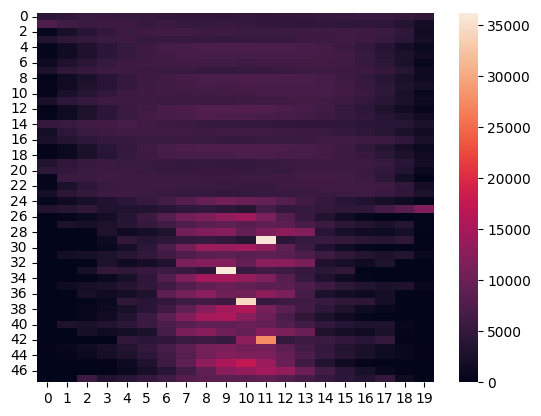

In [8]:
sns.heatmap(x_hist)

Angular velocities (dims 24-47) are much more likely to hover around the 0 point, though the coverage of angular positions is fairly uniform. This looks maybe good enough.
The four very predictable velocities are (i think) the non-actuated dofs.